# Priority Visualizations for Investment Opportunities

This notebook creates two visual summaries. The first is a bar chart that highlights the top 10 Community Areas with the highest overall investment opportunity. The second is a heatmap showing sector specific deficits for bars, gyms, shops, and schools. These visualizations help compare priority zones and understand how each neighborhood differs in its amenity gaps.


In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /usr/local/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load ranking file
df = pd.read_csv("../datasets/final_opportunity_ranking.csv")

# Standardize case
df["ca_name"] = df["ca_name"].str.title()


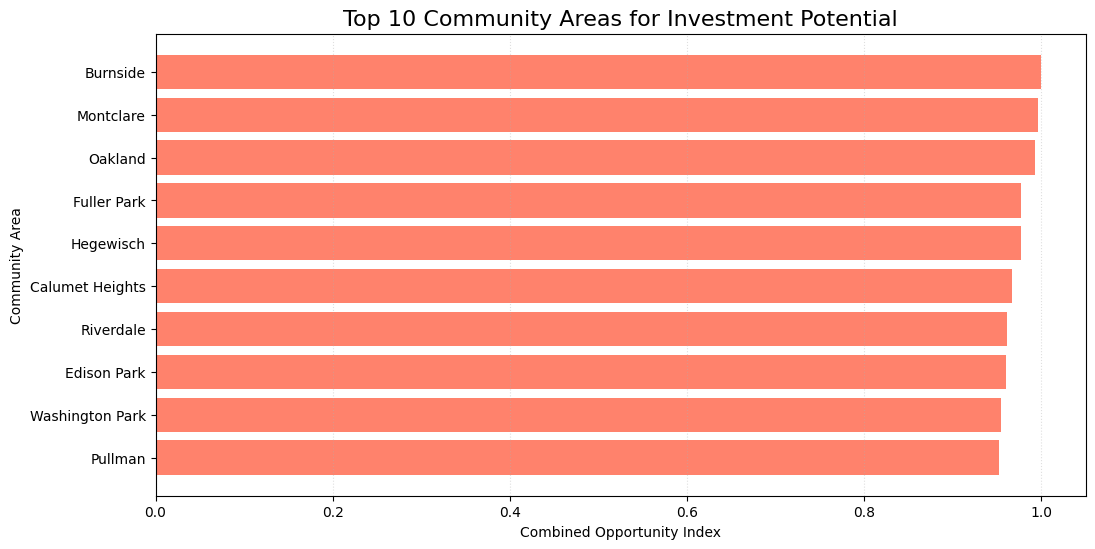

In [4]:
# Sort by overall investment need
top10 = df.sort_values("combined_opportunity_index", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(
    top10["ca_name"],
    top10["combined_opportunity_index"],
    color="tomato",
    alpha=0.8
)

plt.gca().invert_yaxis()  # highest value at top
plt.title("Top 10 Community Areas for Investment Potential", fontsize=16)
plt.xlabel("Combined Opportunity Index")
plt.ylabel("Community Area")
plt.grid(axis="x", linestyle=":", alpha=0.4)

plt.show()


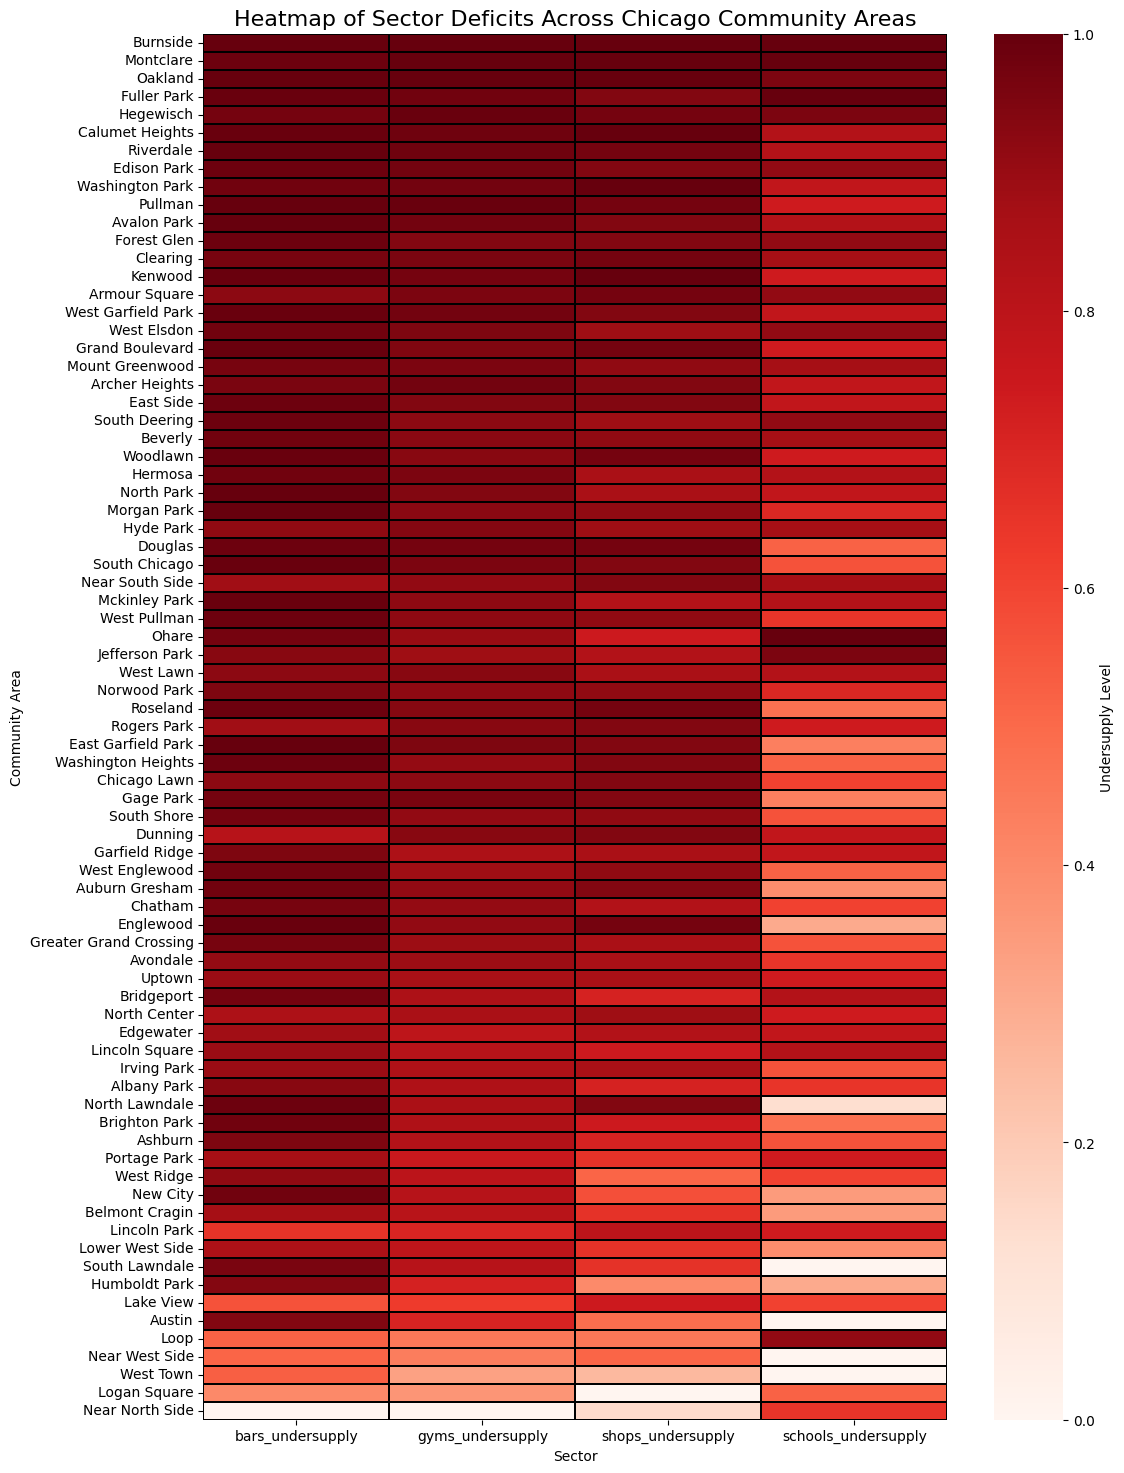

In [5]:
# Keep relevant columns
heatmap_df = df[
    [
        "ca_name",
        "bars_undersupply",
        "gyms_undersupply",
        "shops_undersupply",
        "schools_undersupply"
    ]
]

# Set CA names as index for heatmap readability
heatmap_df = heatmap_df.set_index("ca_name")

plt.figure(figsize=(12, 18))
sns.heatmap(
    heatmap_df,
    cmap="Reds",
    linewidths=0.3,
    linecolor="black",
    cbar_kws={"label": "Undersupply Level"}
)

plt.title("Heatmap of Sector Deficits Across Chicago Community Areas", fontsize=16)
plt.xlabel("Sector")
plt.ylabel("Community Area")

plt.show()
